In [1]:
from rdkit import Chem
import numpy as np
import pandas as pd
from mordred import Calculator, descriptors

# Load data

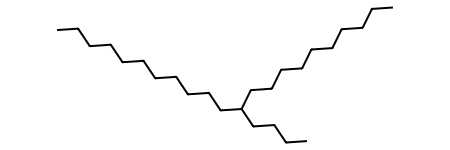

In [2]:
suppl = Chem.SmilesMolSupplier("../data/alkanes_CRC.csv",delimiter=';',smilesColumn=2,titleLine=True,nameColumn=0)
mols = [mol for mol in suppl if mol]
display(mols[5])

In [3]:
df = pd.read_csv("../data/alkanes_CRC.csv",sep=";")

# Define and calculate Zagreb indices

In [4]:
def calculate_zagreb_index_1(mol):
    atoms = mol.GetAtoms()
    sum = 0
    for atom in atoms:
        deg = atom.GetDegree()
        sum += deg*deg
    return(sum)

In [5]:
def calculate_zagreb_index_2(mol):
    bonds = mol.GetBonds()
    zi2 = 0
    for bond in bonds:
        a1_deg = bond.GetBeginAtom().GetDegree()
        a2_deg = bond.GetEndAtom().GetDegree()
        zi2 += a1_deg * a2_deg
    return zi2

In [6]:
df['mol'] = mols
df['M1'] = df.mol.apply(calculate_zagreb_index_1)
df['M2'] = df.mol.apply(calculate_zagreb_index_2)
df['InChIKey'] = df.mol.apply(Chem.inchi.MolToInchiKey)

In [7]:
df.head(2)

,name,boiling_point,SMILES,IUPAC_name,CID,molecular_formula,mol,M1,M2,InChIKey
0,Butane,-0.5,CCCC,butane,7843,C4H10,<rdkit.Chem.rdchem.Mol object at 0x00000254059...,10,8,IJDNQMDRQITEOD-UHFFFAOYSA-N
1,Dodecane,216.3,CCCCCCCCCCCC,dodecane,8182,C12H26,<rdkit.Chem.rdchem.Mol object at 0x00000254059...,42,40,SNRUBQQJIBEYMU-UHFFFAOYSA-N


# Compare with mordred

In [8]:
from mordred import ZagrebIndex

In [9]:
def calc_mordred_zagreb(mol,first):
    calc = Calculator(ZagrebIndex)
    results = calc(mol)
    if first:
        return int(results[0])
    else:
        return int(results[1])


In [10]:
df['M1_mordred'] = df['mol'].apply(lambda mol: calc_mordred_zagreb(mol, first=True))
df['M2_mordred'] = df['mol'].apply(lambda mol: calc_mordred_zagreb(mol, first=False))

In [12]:
# compare
df['M1_equal'] = (df.M1 == df.M1_mordred)
df['M2_equal'] = (df.M2 == df.M2_mordred)
if(df.shape[0] == df.M1_equal.sum()):
    print("M1 is correct")
if(df.shape[0] == df.M2_equal.sum()):
    print("M2 is correct")

df.head(2)

M1 is correct
M2 is correct


,name,boiling_point,SMILES,IUPAC_name,CID,molecular_formula,mol,M1,M2,InChIKey,M1_mordred,M2_mordred,M1_equal,M2_equal
0,Butane,-0.5,CCCC,butane,7843,C4H10,<rdkit.Chem.rdchem.Mol object at 0x00000254059...,10,8,IJDNQMDRQITEOD-UHFFFAOYSA-N,10,8,True,True
1,Dodecane,216.3,CCCCCCCCCCCC,dodecane,8182,C12H26,<rdkit.Chem.rdchem.Mol object at 0x00000254059...,42,40,SNRUBQQJIBEYMU-UHFFFAOYSA-N,42,40,True,True


# Add number of atoms and save data

In [13]:
df['num_atoms'] = df.mol.apply(lambda mol: mol.GetNumAtoms())

In [16]:
df.head(2)

,name,boiling_point,SMILES,IUPAC_name,CID,molecular_formula,mol,M1,M2,InChIKey,M1_mordred,M2_mordred,M1_equal,M2_equal,num_atoms
0,Butane,-0.5,CCCC,butane,7843,C4H10,<rdkit.Chem.rdchem.Mol object at 0x00000254059...,10,8,IJDNQMDRQITEOD-UHFFFAOYSA-N,10,8,True,True,4
1,Dodecane,216.3,CCCCCCCCCCCC,dodecane,8182,C12H26,<rdkit.Chem.rdchem.Mol object at 0x00000254059...,42,40,SNRUBQQJIBEYMU-UHFFFAOYSA-N,42,40,True,True,12


In [17]:
df.drop(columns=["M1_mordred", "M2_mordred", "mol", "M1_equal", "M2_equal"]).to_csv("../data/alkanes_with_zagreb.csv", index=False, sep=';')